# Time series decomposition of the data cube

In [ ]:
using Pkg
Pkg.add(PackageSpec(url="https://github.com/esa-esdl/ESDL.jl"))
Pkg.add(PackageSpec(url="https://github.com/esa-esdl/ESDLPlots.jl"))

In [1]:
using ESDL
using ESDLPlots

WebIO._IJuliaInit()

In [2]:
c             = esdc() #Cube()

YAXArray with the following dimensions
lon                 Axis with 1440 Elements from -179.875 to 179.875
lat                 Axis with 720 Elements from 89.875 to -89.875
time                Axis with 1840 Elements from 1979-01-05T00:00:00 to 2018-12-31T00:00:00
Variable            Axis with 69 elements: leaf_area_index sensible_heat .. snow_sublimation Rg 
units: W m-2
Total size: 490.37 GB


In [3]:
vars          = "net_ecosystem_exchange";
cdata         = subsetcube(c,lat = 50..55, lon = 30..35,variable=vars,time=2001:2008); 

We want to decompose the time series into a signals of Trend, Seasonal cycle, low-frequency variations and high-frequency variantions. Here we use a Fourier-based approach by calling **filterTSFFT**. Before doing so, we need to do some gapFilling

In [4]:
cube_filled=gapFillMSC(cdata);

In [5]:
xout=filterTSFFT(cube_filled)

YAXArray with the following dimensions
time                Axis with 368 Elements from 2001-01-05T00:00:00 to 2008-12-30T00:00:00
Scale               Axis with 4 elements: Trend Long-Term Variability Annual Cycle Fast Oscillations 
lon                 Axis with 20 Elements from 30.125 to 34.875
lat                 Axis with 20 Elements from 54.875 to 50.125
Total size: 2.25 MB


And we can plot the resulting decomposed time series

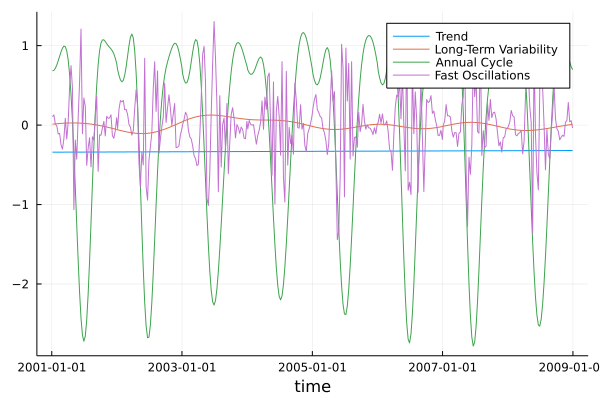

In [10]:
#p = plotXY(xout,xaxis=TimeAxis,group="scale",lon=35,lat=50.5)
p = plotXY(xout,xaxis="time",group="scale",lon=35,lat=50.5)

In [7]:
import Statistics: var
variance = mapslices(var, xout, dims = "Time")

YAXArray with the following dimensions
Scale               Axis with 4 elements: Trend Long-Term Variability Annual Cycle Fast Oscillations 
lon                 Axis with 20 Elements from 30.125 to 34.875
lat                 Axis with 20 Elements from 54.875 to 50.125
Total size: 6.25 KB


Let's look at a map of the variability in the Trend signal to see where trends in net ecosystem exchange are strongest.

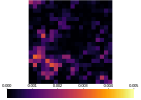

In [8]:
plotMAP(variance,scale="Trend",dmax=0.005)

One can also check which areas have the strongest variance in the seasonal cycle

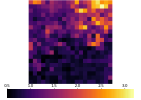

In [9]:
plotMAP(variance,scale="Annual Cycle")